In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd

# cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# модели
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# метрики
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# 1. Линейная регрессия. Градиентный спуск.

***1) Создадим класс линейной регрессии***

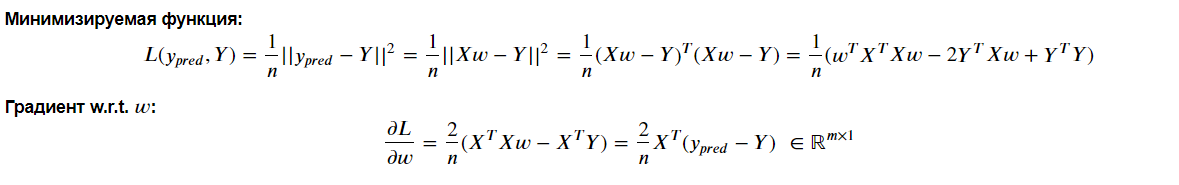

In [2]:
class MyLinearRegression(object):
    
    def __init__(self,  w0=None, k=50, h=0.01):
        self.k = k   # количество итераций
        self.w = w0  # вектор начальных значений [n, 1]
        self.h = h   # learning rate
        self.func = []

        
    def fit(self, X, y): 
        self.X = X   # матрица обьектов [l,n]
        self.y = y   # вектор ответов [l,1]
        self.X = np.hstack((np.ones((self.X.shape[0],1)), self.X)) # добавили bias
        self.m = self.X.shape[1] # кол-во столбцов
        self.l = self.X.shape[0] # кол-во строк
        if self.w == None:
            self.w = np.random.rand(self.m,1) # зададим случайное значение
            
        for i in range(self.k):
            self.func.append(self.Loss(self.w)) #значеня функции потерь
            self.w = self.w - self.MyGD(self.w)*self.h # обновление шага

            
    def MyGD(self, w):
        return 2/self.l*self.X.T @ (self.X @ w - self.y) # формула градиентного спуска для MSE
    
    def MyGD1(self, w): # формула градиентного спуска напрямую через определение предела
        h = 0.0001
        dw = np.eye(self.m)*h
        f = lambda x: np.sum((self.y - self.X @ x)**2)/self.l
        return np.array([(f(w+dw[:,i]) - f(w))/h for i in range(self.m)])[:,np.newaxis]
        
    def Loss(self, w): # mse
        return np.sum((self.y - self.X @ w)**2)/self.l
    
    def predict(self, X):
        return np.hstack((np.ones((X.shape[0],1)), X)) @ self.w
    
    

***2) зададим начальную функцию***

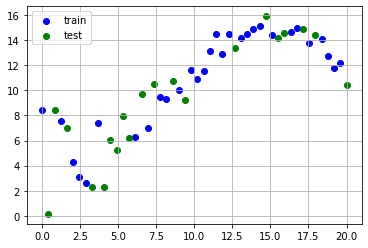

In [3]:
x = np.linspace(0, 20, 50)[:, np.newaxis]
l = x.shape[0]
y = x*np.sin(x*0.13)+ np.random.rand(l,1)*np.exp(-0.1*x)*10

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.6)
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, marker='o', color='blue', label= 'train')
ax.scatter(X_test, y_test, marker='o', color='green', label='test')
ax.grid()
ax.legend()

***3) построение модели***

In [8]:
regressor1 = MyLinearRegression(k=500, h = 0.001)
regressor2 = LinearRegression()
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)




***добавим критерии качества (метрики)***

In [9]:
def accuracy(y_test, y_pred):
    print(f'mse {mean_squared_error(y_test, y_pred)}\nr2 {r2_score(y_test, y_pred)}')


***4) визуализация***

In [15]:
# модель и значения функции потерь
def plots(X_train,y_train, X_test, y_test, y_pred1, y_pred2):
        fig, ax = plt.subplots(1,2, figsize=(12,5))
        ax[1].plot(regressor1.func, lw=2)
        ax[1].set_title('Loss function of my regression')
        ax[1].set_xlabel('steps')
        
        ax[0].scatter(X_train[:,0], y_train, marker='o', color='blue', label= 'train')
        ax[0].scatter(X_test[:,0], y_test, marker='o', color='green', label='test')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')
        ax[0].grid()
        X = pd.DataFrame(np.concatenate((X_test,y_pred1, y_pred2), axis=1)).sort_values(by=0)

        ax[0].plot(X.iloc[:,0],X.iloc[:,-2], label='my', lw=2)
        ax[0].plot(X.iloc[:,0],X.iloc[:,-1], label='sklearn', lw=2)
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')
        ax[0].legend()
        ax[0].set_ylim(min(y),max(y))

        print('my regression')
        accuracy(y_test, y_pred1) 
        print('sklearn')
        accuracy(y_test, y_pred2)
        
def plots_sklearn(X_train,y_train, X_test, y_test, y_pred):
        fig, ax = plt.subplots(figsize=(12,5))

        
        ax.scatter(X_train[:,0], y_train, marker='o', color='blue', label= 'train')
        ax.scatter(X_test[:,0], y_test, marker='o', color='green', label='test')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid()
        X = pd.DataFrame(np.concatenate((X_test,y_pred), axis=1)).sort_values(by=0)

        ax.plot(X.iloc[:,0],X.iloc[:,-1], label='sklearn', lw=2)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()


        print('sklearn')
        accuracy(y_test, y_pred)

my regression
mse 6.248676745138561
r2 0.6175722172360459
sklearn
mse 4.469473546483055
r2 0.7264619489504798
sklearn
mse 4.469473546483055
r2 0.7264619489504798


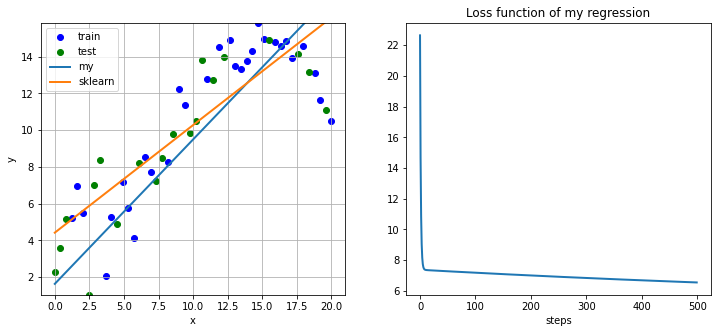

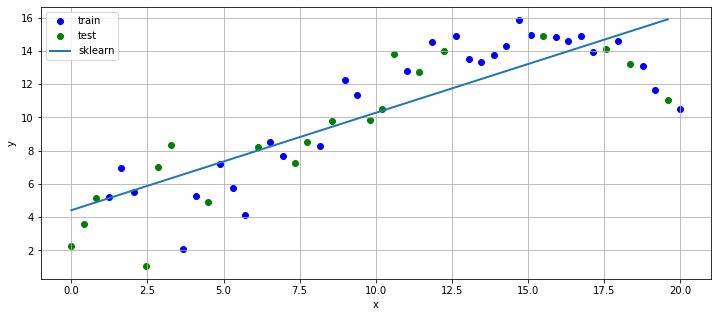

In [16]:
plots(X_train,y_train, X_test, y_test, y_pred1, y_pred2)
plots_sklearn(X_train,y_train, X_test, y_test, y_pred2)

In [17]:
print(regressor2.coef_) #веса
print(regressor2.intercept_) #нулевой вес bias
print(regressor2.score(X_test, y_test)) #R2
print(regressor2.get_params()) #Параметры регрессии


[[0.5856322]]
[4.42283754]
0.7264619489504798
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


***5) посмотрим на кросс валидацию***

важное замечение,
cross_validation(X,y,cv = k) не использует shuffle!!!, 
поэтому зачастую выдает самую плохую модель,
для адекватности надо писать
cross_validation(X,y,cv = KFold(n_splits=3,shuffle=True))

In [9]:
cv_d1 = KFold(2,shuffle=False) # берет индексы попорядку
cv_d2 = KFold(2,shuffle=True) # тестовая меняется трейн
cv_d3 = KFold(4,shuffle=True) # отбирает рандомно, но попорядку
print(list(iter(cv_d1.split(np.arange(0,8)))))
print(list(iter(cv_d2.split(np.arange(0,8)))))
print(list(iter(cv_d3.split(np.arange(0,8)))),'\n')

cv_s = ShuffleSplit(3, test_size=0.2) #генерирует рандомно 3 случая с test=0.5
print(list(iter(cv_s.split(np.arange(0,10)))))


[(array([4, 5, 6, 7]), array([0, 1, 2, 3])), (array([0, 1, 2, 3]), array([4, 5, 6, 7]))]
[(array([1, 2, 3, 5]), array([0, 4, 6, 7])), (array([0, 4, 6, 7]), array([1, 2, 3, 5]))]
[(array([0, 1, 2, 3, 4, 7]), array([5, 6])), (array([0, 3, 4, 5, 6, 7]), array([1, 2])), (array([0, 1, 2, 5, 6, 7]), array([3, 4])), (array([1, 2, 3, 4, 5, 6]), array([0, 7]))] 

[(array([2, 1, 9, 3, 4, 8, 7, 0]), array([5, 6])), (array([4, 5, 3, 1, 8, 6, 0, 9]), array([2, 7])), (array([4, 1, 3, 0, 5, 8, 6, 9]), array([2, 7]))]


In [28]:
scores = cross_validate(LinearRegression(), x, y,
                        cv=KFold(n_splits=5, shuffle=True, random_state=42),
                        scoring=('r2', 'neg_mean_squared_error'))
print('средняя оценка модели', scores['test_r2'].mean())

средняя оценка модели 0.6356987571987045


***6) добавим признаков искусственно, чтобы улучшить модель***

In [29]:
x_new = np.concatenate((x,x**2, x**3, x**4,x**5),axis=1)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new,y, train_size=0.6, shuffle=True)

In [34]:
scores = cross_validate(LinearRegression(), x_new, y,
                        cv=KFold(n_splits=5, shuffle=True, random_state=42),
                        scoring=('r2', 'neg_mean_squared_error'))
print('средняя оценка модели', scores['test_r2'].sum()/5)

средняя оценка модели 0.8861621777861484


sklearn
mse 2.5814507810062564
r2 0.8426893905820164
[[ 6.13108387e-01 -9.24255786e-02  2.70551197e-02 -1.89758540e-03
   3.73018450e-05]]


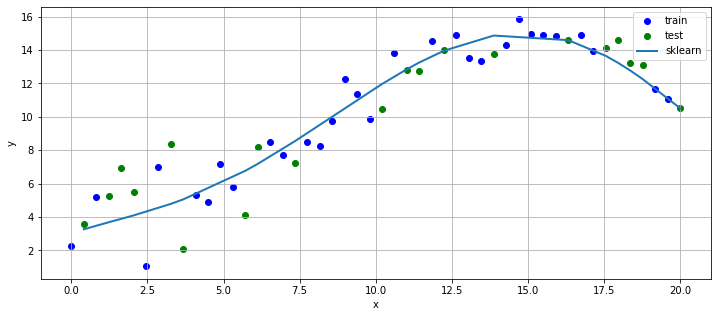

In [35]:
regressor2_new = LinearRegression()
regressor2_new.fit(X_train_new,y_train_new)
y_pred2_new = regressor2_new.predict(X_test_new)
plots_sklearn(X_train_new,y_train_new, X_test_new, y_test_new, y_pred2_new)
print(regressor2_new.coef_)

Ridge и Lasso принудительно уменьшают веса

sklearn
mse 2.249516350296023
r2 0.9006453644577429
[[-2.37694920e-01 -2.63864064e-02  2.89363569e-02 -2.25128384e-03
   4.69722561e-05]]


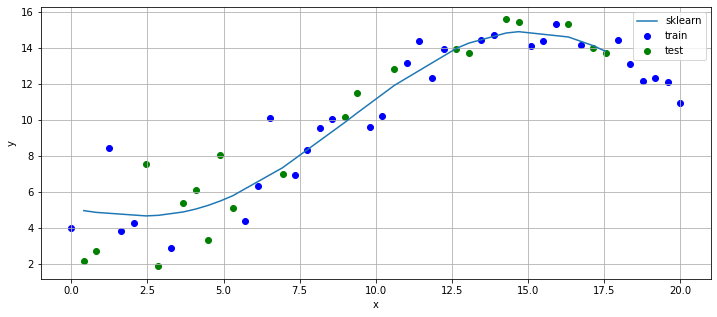

In [14]:
regressor2_new = Ridge(0.9)
regressor2_new.fit(X_train_new,y_train_new)
y_pred2_new = regressor2_new.predict(X_test_new)
plots_sklearn(X_train_new,y_train_new, X_test_new, y_test_new, y_pred2_new)
print(regressor2_new.coef_)

In [15]:
regressor2_new = Lasso(0.7)
regressor2_new.fit(X_train_new,y_train_new)
y_pred2_new = regressor2_new.predict(X_test_new)
# plots_sklearn(X_train_new,y_train_new, X_test_new, y_test_new, y_pred2_new)
print(regressor2_new.coef_)
accuracy(y_test_new, y_pred2_new)

[-0.00000000e+00  7.78059538e-02  2.83912799e-04 -1.17134720e-04
 -2.60710110e-06]
mse 2.159615926668118
r2 0.9046160063352601


**Вывод: добавив новые признаки получилось достичь высокого показателя**

# 2. Линейная Регрессия. Пример

In [16]:
df = pd.read_csv('AppleStore.csv')

In [17]:
df.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


***1. выберем только нужные признаки и обработаем***

In [18]:
columns = ['size_bytes',
           'price',
           'rating_count_tot',
           'rating_count_ver',
           'user_rating_ver',
           'cont_rating',
           'prime_genre',
           'sup_devices.num',
           'ipadSc_urls.num',
           'lang.num',
           'vpp_lic',
          'user_rating']
goal = df['user_rating']

In [19]:
data = df[columns]

In [20]:
data['cont_rating'] = data['cont_rating'].apply(lambda x: int(x[:-1]))

In [21]:
data.dropna()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating
0,100788224,3.99,21292,26,4.5,4,Games,38,5,10,1,4.0
1,158578688,0.00,161065,26,3.5,4,Productivity,37,5,23,1,4.0
2,100524032,0.00,188583,2822,4.5,4,Weather,37,5,3,1,3.5
3,128512000,0.00,262241,649,4.5,12,Shopping,37,5,9,1,4.0
4,92774400,0.00,985920,5320,5.0,4,Reference,37,5,45,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5,4,Games,38,5,1,1,4.5
7193,120760320,0.00,30,30,4.5,4,Games,38,0,1,1,4.5
7194,111322112,1.99,15,0,0.0,9,Utilities,37,1,1,1,4.5
7195,97235968,0.00,85,32,4.5,12,Games,38,0,2,1,4.5


***2. Посмотрим на данные***

array([[<AxesSubplot:title={'center':'size_bytes'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'rating_count_tot'}>],
       [<AxesSubplot:title={'center':'rating_count_ver'}>,
        <AxesSubplot:title={'center':'user_rating_ver'}>,
        <AxesSubplot:title={'center':'cont_rating'}>],
       [<AxesSubplot:title={'center':'sup_devices.num'}>,
        <AxesSubplot:title={'center':'ipadSc_urls.num'}>,
        <AxesSubplot:title={'center':'lang.num'}>],
       [<AxesSubplot:title={'center':'vpp_lic'}>,
        <AxesSubplot:title={'center':'user_rating'}>, <AxesSubplot:>]],
      dtype=object)

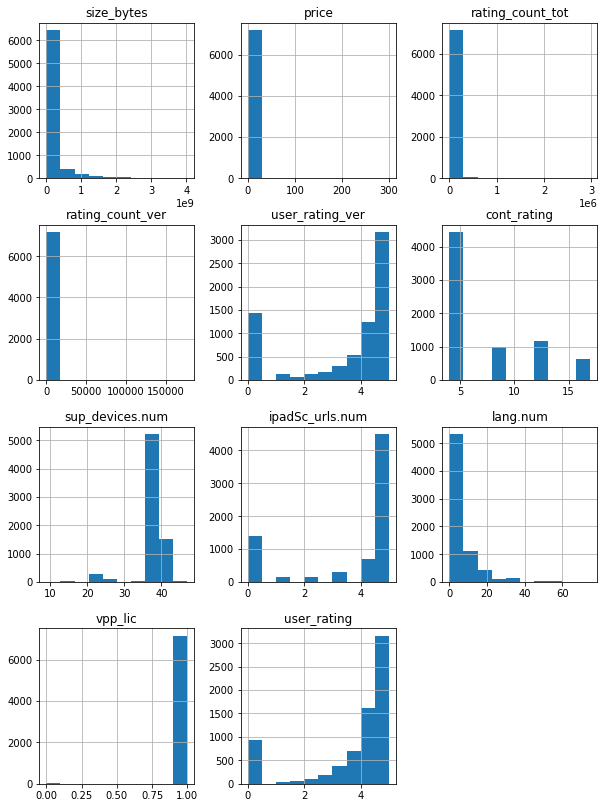

In [22]:
data.hist(figsize=(10,14))

In [23]:
data.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating
size_bytes,1.000000,0.182392,0.004486,0.006337,0.086075,0.140541,-0.118347,0.152697,0.004614,-0.150418,0.066256
price,0.182392,1.000000,-0.039044,-0.018012,0.025173,-0.029666,-0.115361,0.066100,-0.006713,-0.029942,0.046601
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.088744,0.009139,0.008832,0.015734,0.137675,-0.000982,0.083310
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.077840,0.001435,0.037951,0.024333,0.013287,0.006460,0.068754
user_rating_ver,0.086075,0.025173,0.088744,0.077840,1.000000,-0.120357,-0.018901,0.275737,0.175580,0.050094,0.774140
cont_rating,0.140541,-0.029666,0.009139,0.001435,-0.120357,1.000000,0.020085,-0.107726,-0.069508,-0.044961,-0.097999
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.018901,0.020085,1.000000,-0.037728,-0.041681,-0.037109,-0.042451
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.275737,-0.107726,-0.037728,1.000000,0.088378,0.071901,0.265671
lang.num,0.004614,-0.006713,0.137675,0.013287,0.175580,-0.069508,-0.041681,0.088378,1.000000,0.032477,0.170976
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.050094,-0.044961,-0.037109,0.071901,0.032477,1.000000,0.069816


Вывод: данные слабо коррелируют с рейтингом, предсказание хорошее сделать будет сложно

***3. Категориальные признаки***

In [24]:
# One-hot-encoding
data = pd.get_dummies(data, columns=['prime_genre'])

***4. Стандартизируем данные и построим модели***

In [25]:
data = data.drop(columns=['user_rating'])

In [26]:
from sklearn.preprocessing import StandardScaler
# Обычно надо применить по отдельности к train и test
pca = StandardScaler() #обьект
X = pca.fit_transform(data)

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(data, goal, test_size=0.2)

In [28]:

res = cross_validate(LinearRegression(), X, goal, cv=KFold(5, shuffle=True),
               scoring=('neg_mean_squared_error','r2'),
                return_estimator=True)
print('r = ',res['test_r2'].mean())


print(res['estimator'][0].intercept_,res['estimator'][0].coef_)

r =  0.6044183513678109
3.529785591725241 [-5.71986724e-03  3.79432783e-02  1.48761498e-02  1.09189832e-02
  1.13349236e+00  9.13817149e-03 -2.57957634e-02  1.15187000e-01
  3.03158107e-02  3.49914441e-02  9.82407349e+08  7.03556853e+08
  2.95655857e+08  1.92761610e+09  2.08205343e+09  9.47205724e+08
  7.39349003e+08  3.95791732e+09  1.23943757e+09  1.11142677e+09
  4.47978600e+08  1.08848838e+09  6.32521029e+08  8.06017146e+08
  1.70493275e+09  1.23270820e+09  7.45141520e+08  1.02460342e+09
  1.19494678e+09  9.91000128e+08  8.37284677e+08  1.44777029e+09
  7.89898605e+08]


In [29]:
X = pca.fit_transform(data[['user_rating_ver','ipadSc_urls.num']])
res = cross_validate(LinearRegression(), X, goal, cv=KFold(5, shuffle=True),
               scoring=('neg_mean_squared_error','r2'),
                    return_estimator=True)
print('r = ',res['test_r2'].mean())

print(res['estimator'][0].intercept_,res['estimator'][0].coef_)

r =  0.6015184164596854
3.532870903799579 [1.14210003 0.08373016]


**Вывод: по сути, все держиться на двух параметрах, ибо есть хоть какая то корреляция с результатом**

***5. Проведем регуляризацию***

In [30]:
X = pca.fit_transform(data)
res = cross_validate(Ridge(0.9), X, goal, cv=KFold(5, shuffle=True),
               scoring=('neg_mean_squared_error','r2'),
                return_estimator=True)
print('r = ',res['test_r2'].mean())

print(res['estimator'][0].intercept_,res['estimator'][0].coef_)

r =  0.6037358681839098
3.526399535655463 [ 9.34857792e-04  3.41515850e-02  1.30801278e-02  1.15298328e-02
  1.14446847e+00  9.50111911e-03 -1.56593570e-02  9.82176203e-02
  4.38827255e-02  3.99495175e-02 -3.26411724e-02  1.70615629e-02
 -3.19044956e-02 -1.84498306e-02 -1.03648757e-02 -1.97161170e-03
  2.29285950e-02 -3.43179703e-02  2.14072211e-02 -1.51273538e-02
 -8.43021626e-03  2.21148389e-03 -8.98239432e-03  2.80201432e-02
  2.28601248e-02  1.91626890e-02  6.05919763e-03  6.43686931e-02
  4.29465929e-03 -3.31666786e-03  2.37304410e-02  1.50264396e-02
  7.08468503e-03]


***6. Попробуем найти лучшие параметры***

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': np.arange(0,1,0.05)}],
                               cv=KFold(5, shuffle=True),
                               scoring='r2',
                               verbose=1)
gbr_grid_search.fit(X, goal)

NameError: name 'X' is not defined

In [33]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 0.0}
0.6045961494836517
Ridge(alpha=0.0)


***7. Регрессия с кросс валидацией и грид сеарчем + SGD***

In [34]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
X, y = load_diabetes(return_X_y=True)

clf = RidgeCV(alphas=np.arange(0,1,0.1), cv=KFold(5,shuffle=True)).fit(X, y)
print(f'Для RidgeCV\nлучшее значение на кроссвалидации: {clf.best_score_},\n\
лучший гиперпараметр: {clf.alpha_},\n\
обучение на всей выборке: {clf.score(X, y)}\n')
clf1=cross_validate(Ridge(0.1),X,y,cv=KFold(5,shuffle=True),scoring='r2')['test_score'].mean()
clf2=cross_validate(LinearRegression(),X,y,cv=KFold(5,shuffle=True),scoring='r2')['test_score'].mean()
clf3=cross_validate(SGDRegressor(),X,y,cv=KFold(5,shuffle=True),scoring='r2')['test_score'].mean() 
print(f'Ridge\n{clf1}\n')
print(f'LinearRegression\n{clf2}\n')
print(f'SGDRegression\n{clf3}')


Для RidgeCV
лучшее значение на кроссвалидации: 0.46755346404711984,
лучший гиперпараметр: 0.1,
обучение на всей выборке: 0.5125629767961004

Ridge
0.4756285584027057

LinearRegression
0.4807614089746397

SGDRegression
0.4098764447693606


In [35]:
import timeit
start_time = timeit.default_timer()
timeit.default_timer() - start_time

5.48000000000215e-05

In [36]:
x = np.random.randn(10000,1000)
y = np.sum(np.sin(x),axis=1)[:,np.newaxis]


import timeit
start_time = timeit.default_timer()
print('LinearRegression')
print('score', LinearRegression().fit(x,y).score(x,y))
print('time', timeit.default_timer() - start_time)
print()
print('SGD')
start_time = timeit.default_timer()
print('score', SGDRegressor().fit(x,y).score(x,y))
print('time', timeit.default_timer() - start_time)

LinearRegression
score 0.8660505697226386
time 1.7199229999999996

SGD
score 0.8495468853655652
time 2.0451432999999994


***8. Попробуем улучшить результат***

In [6]:
df = pd.read_csv('AppleStore.csv')
import seaborn as sns

1. Подготовим данные

<AxesSubplot:>

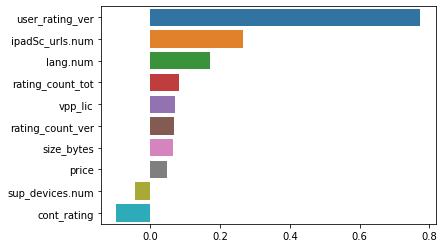

In [7]:
numeric = ['size_bytes',
           'price',
           'rating_count_tot',
           'rating_count_ver',
           'user_rating_ver',
           'cont_rating',
           'sup_devices.num',
           'ipadSc_urls.num',
           'lang.num',
           'vpp_lic']
categorical = ['prime_genre']
goal = df['user_rating']

data = df[numeric + categorical]
data['cont_rating'] = data['cont_rating'].apply(lambda x: int(x[:-1]))
data.dropna()

my_corr = data.corrwith(goal).sort_values(ascending=False)
sns.barplot(y = my_corr.index, x = my_corr)

2. Построим pipeline для числовых

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Для Ridge
X_train, X_test, y_train, y_test = train_test_split(data, goal, test_size=0.3, random_state=10)

column_transformer = ColumnTransformer([
                            ('scaling', StandardScaler(), numeric)
])

Ridge_pipline = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge_pipline.fit(X_train, y_train)
y_pred = model.predict(X_test)

def scores(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
print('для Ridge с неоптимальным параметром:')
print(f'{scores(y_test, y_pred)}')

# Проведем кросс-валидацию

cv1 = cross_validate(Ridge_pipline, data, goal, 
                     cv=KFold(5, shuffle=True, random_state=10), scoring='r2')
print(f"минимальное {min(cv1['test_score'])}\nсреднее {cv1['test_score'].mean()}")

# найдем оптимальное alpha
alphas = np.linspace(10, 30, 20)
gsCV1 = GridSearchCV(Ridge_pipline, [{'regression__alpha': alphas}],
                                     cv=KFold(5, shuffle=True, random_state=10), 
                                     scoring='r2', n_jobs=-1).fit(data, goal)

print(f'\nоптимальный alpha = {gsCV1.best_params_}')
print(f'среднее r2 = {gsCV1.best_score_}')


для Ridge с неоптимальным параметром:
0.5955854753551868
минимальное 0.5807274305370651
среднее 0.6031070701412805

оптимальный alpha = {'regression__alpha': 14.210526315789473}
среднее r2 = 0.6031105553349757


In [17]:
??StandardScaler

3. Попробуем добавить категориальные

In [15]:
# Для Ridge
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(data, goal, test_size=0.3, random_state=10)

column_transformer = ColumnTransformer([
                            ('ohe', OneHotEncoder(), categorical),
                            ('scaling', StandardScaler(), numeric)

])

Ridge_pipline = Pipeline(steps=[
    ('scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge_pipline.fit(X_train, y_train)
y_pred = model.predict(X_test)

def scores(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
print('для Ridge с неоптимальным параметром:')
print(f'{scores(y_test, y_pred)}')

# Проведем кросс-валидацию

cv1 = cross_validate(Ridge_pipline, data, goal, 
                     cv=KFold(5, shuffle=True, random_state=10), scoring='r2')
print(f"минимальное {min(cv1['test_score'])}\nсреднее {cv1['test_score'].mean()}")

# найдем оптимальное alpha
alphas = np.linspace(10, 30, 20)
gsCV1 = GridSearchCV(Ridge_pipline, [{'regression__alpha': alphas}],
                                     cv=KFold(5, shuffle=True, random_state=10), 
                                     scoring='r2', n_jobs=-1).fit(data, goal)

print(f'\nоптимальный alpha = {gsCV1.best_params_}')
print(f'среднее r2 = {gsCV1.best_score_}')


для Ridge с неоптимальным параметром:
0.5986553679774766
минимальное 0.5818420714946804
среднее 0.6037041997284658

оптимальный alpha = {'regression__alpha': 30.0}
среднее r2 = 0.6043057065846563
